# Lecture 4: Optimization
## ECON5170 Computational Methods in Economics
#### Author: Zhentao Shi
#### Date: July 2019

# Numerical Optimization

Optimization is the key step to carry out econometric extremum estimation.
A general optimization problem is formulated as
$$\min_{\theta \in \Theta } f(\theta) \,\, \mbox{ s.t. }  g(\theta) = 0, h(\theta) \leq 0,$$
where $f(\cdot)$ is a criterion function, $g(\theta) = 0$ is an equality constraint,
and $h(\theta)\leq 0$ is an inequality constraint.

Most established numerical optimization algorithms aim at finding a local minimum.
However, there is no guarantee to locate the global minimum when multiple local minima exist.

Optimization without the equality and/or inequality constraints is called
an *unconstrained* problem; otherwise it is called a *constrained* problem.
The constraints can be incorporated into the criterion function via Lagrangian.

## Methods

There are many optimization algorithms in the field of operational research;
they are variants of a small handful of main principles.

The fundamental idea for twice-differentiable objective function is the Newton's method.
A necessary condition for optimization is
$s(\theta) = \partial f(\theta) / \partial \theta = 0$.

At an initial trial value $\theta_0$, if $s(\theta_0) \neq 0$, the research is updated by
$$
\theta_{t+1} = \theta_{t} -  \left( H(\theta_t)  \right)^{-1}  s(\theta_t)
$$
for $t=0,1,\cdots$ where
$H(\theta) = \frac{ \partial s(\theta )}{ \partial \theta}$
is the Hessian matrix.
The algorithm iterates
until $|\theta_{t+1} -\theta_{t}| < \epsilon$ (absolute criterion) and/or
$|\theta_{t+1} -\theta_{t}|/|\theta_{t}| < \epsilon$ (relative criterion), where
$\epsilon$ is a small positive number chosen as a tolerance level.



**Newton's Method.** Newton's method seeks the solution to
$s(\theta) = 0$. Recall that the first-order condition is a necessary condition but not a sufficient
condition. We still need to verify the second-order condition to identify
whether a root to $s(\theta)$ is associated to a minimizer or a maximizer,
and we compare the values of the mimima to decide a
global minimum.

It is clear that Newton's method requires
computation of the gradient $s(\theta)$ and the Hessian $H(\theta)$.
Newton's method converges at quadratic rate, which is fast.

**Quasi-Newton Method.** The most well-known quasi-Newton algorithm is
[BFGS](http://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm).
It avoids explicit calculation of the computationally expensive Hessian matrix. Instead, starting from an initial (inverse)
Hessian, it updates the Hessian by an explicit formula motivated from the idea of quadratic approximation.

**Derivative-Free Method.** [Nelder-Mead](http://en.wikipedia.org/wiki/Nelder%E2%80%93Mead_method)
is a simplex method. It searches a local minimum by reflection, expansion and contraction.

## Implementation

Python's optimization infrastructure has been constantly improving.
[Pythons Optimization Packages](https://wiki.python.org/moin/PythonForOperationsResearch) and [Comparison of Python Optimization Packages](https://en.wikipedia.org/wiki/Comparison_of_optimization_software)
gives an overview of the available packages.

**Example**

We use [SciPy](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html) to solve pseudo Poisson maximum likelihood estimation (PPML).
If $y_i$ is a continuous random variable, it obviously does not follow a Poisson
distribution, whose support consists of non-negative integers. However, if the conditional mean model
$$E[y_i | x_i] = \exp( x_i' \beta),$$
is satisfied, we can still use the Poisson regression to obtain a consistent
estimator of the parameter $\beta$ even if $y_i$ does not follow a conditional
Poisson distribution.

If $Z$ follows a Poisson distribution with mean $\lambda$, the probability mass function
$$
\Pr(Z = k) = \frac{\mathrm{e}^{-\lambda} \lambda^k}{k!}, \mbox{ for }k=0,1,2,\ldots,
$$
so that
$$
\log \Pr(Y = y | x) =  -\exp(x'\beta) + y\cdot x'\beta - \log k!
$$
Since the last term is irrelevant to the parameter, the
log-likelihood function is
$$
\ell(\beta) = \log \Pr( \mathbf{y} | \mathbf{x};\beta ) =
-\sum_{i=1}^n \exp(x_i'\beta) + \sum_{i=1}^n y_i x_i'\beta.
$$
In addition, it is easy to write the gradient
$$
s(\beta) =\frac{\partial \ell(\beta)}{\partial \beta} =
-\sum_{i=1}^n \exp(x_i'\beta)x_i + \sum_{i=1}^n y_i x_i.
$$
and verify that the Hessian
$$
H(\beta) = \frac{\partial^2 \ell(\beta)}{\partial \beta \partial \beta'} =
-\sum_{i=1}^n \exp(x_i'\beta)x_i x_i' - \sum_{i=1}^n \exp(x_i'\beta)
$$
is negative definite. Therefore, $\ell(\beta)$ is strictly concave
in $\beta$.

In economics we have utility maximization and cost minimization.
In statistics we have maximum likelihood estimation and minimal least squared estimation.
In operational reserach, the default optimization is minimization, not maximization.
To follow this convention, here we formulate the *negative* log-likelihood.

In [1]:
# Import the NumPy library
import numpy as np
# Import the Pandas library
import pandas as pd
# Import from SciPy library the optimize package
from scipy.optimize import minimize
# Import Math
import math as ma
# import matplotlib
import matplotlib as plt
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [2]:
def poisson_loglik(b):
    b = np.asarray(b).reshape(2,1)
    Xb = np.exp(np.dot(X, b))
    cols = -Xb + np.multiply(np.asarray(y), np.log(Xb))
    ell = -cols.sum()
    return(ell)

To implement optimization in `Python`, it is recommended to write the criterion as a
function of the parameter. Data can be fed inside or outside of the function.
If the data is provided as additional arguments, these arguments must be explicit.
(In constrast, in `Matlab` the parameter must be the sole argument for the function to be
optimized, and data can only be injected through a nested function.)

**Example**

To get the gist of implementing an optimization problem into Python, we make a quick tour and implement the famous [Rosenbrock function](https://en.wikipedia.org/wiki/Rosenbrock_function)

In [3]:
# Quick Implementation of The Rosenbrock function
def rosen(x):
    """The Rosenbrock function"""
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)

In [4]:
x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2])
res = minimize(rosen, x0, method='nelder-mead',
               options={'xtol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 339
         Function evaluations: 571


**Example**

Import Recreation Demand to apply the MLE via optimization packages

In [5]:
## prepare the data
df = pd.read_csv(r'/Users/marckullmann/Documents/Python/Lectures/RecreationDemand.csv', sep=';', encoding='latin1')
df[:3]

,trips,quality,ski,income,userfee,costC,costS,costH
1,0,0,yes,4,no,"67,59","68,62","76,8"
2,0,0,no,9,no,"68,86","70,936","84,78"
3,0,0,yes,5,no,"58,12","59,465","72,11"


In [6]:
# prepare the data
y = pd.DataFrame(data = df['trips'], columns = ['trips'])

ones = pd.DataFrame(data = (np.ones((df.shape[0], 1))), columns=['ones'])
income = pd.DataFrame(data = df["income"], columns = ['income'])

X = pd.DataFrame(data = ones, columns=['ones'])
X['income'] = income.values

backup = X

In [7]:
#implement both BFGS and Nelder-Mead for comparison.

x0 = np.array([0,-1])
b_hat_nm = minimize(poisson_loglik, x0, method='nelder-mead', 
                    options={'xtol': 1e-8, 'disp': False, 'maxiter' : 500})
b_hat_bfgs = minimize(poisson_loglik, x0, method='BFGS', 
                      options={'xtol': 1e-8, 'disp': False, 'maxiter' : 500})

print('Nelder-Mead: \n', b_hat_nm, '\n \n',
     'BFGS: \n', b_hat_bfgs)

Nelder-Mead: 
  final_simplex: (array([[ 1.17739744, -0.09993984],
       [ 1.17739745, -0.09993985],
       [ 1.17739745, -0.09993984]]), array([261.1140783, 261.1140783, 261.1140783]))
           fun: 261.11407829532857
       message: 'Optimization terminated successfully.'
          nfev: 197
           nit: 102
        status: 0
       success: True
             x: array([ 1.17739744, -0.09993984]) 
 
 BFGS: 
       fun: 261.11407829533
 hess_inv: array([[ 0.0036817 , -0.00085069],
       [-0.00085069,  0.00024087]])
      jac: array([-3.81469727e-06, -3.81469727e-06])
  message: 'Optimization terminated successfully.'
     nfev: 64
      nit: 11
     njev: 16
   status: 0
  success: True
        x: array([ 1.17739751, -0.09993986])


/Users/marckullmann/.conda/envs/Lecture_20199807/lib/python3.7/site-packages/ipykernel_launcher.py:7: OptimizeWarning: Unknown solver options: xtol
  import sys


Given the conditional mean model, nonlinear least squares (NLS) is also consistent in theory.
NLS minimizes
$$
\sum_{i=1}^n (y_i - \exp(x_i \beta))^2
$$
A natural question is: why do we prefer PPML to NLS?
My argument is that, PPML's optimization for the linear index is globally convex, while NLS is not.
It implies that the numerical optimization of PPML is easier and more robust than that of NLS. I leave the derivation of the non-convexity of NLS
as an exercise.


In practice no algorithm suits all problems. Simulation, where the true parameter is known,
  is helpful to check the accuracy of one's optimization routine before applying to an empirical problem,
  where the true parameter is unknown.
Contour plot is a useful tool to visualize the function surface/manifold in a low dimension.

**Example**


In [8]:
x_grid = np.arange(start = 0, stop = 1.8, step = 0.02)
x_length = len(x_grid)
y_grid = np.arange(-0.5, .2, 0.01)
y_length = len(y_grid)

z_contour = np.asmatrix(np.zeros((x_length, y_length)))

for i in range(x_length):
    for j in range(y_length):
        z_contour[i, j] = poisson_loglik((x_grid[i], y_grid[j]))

Text(0.5, 1.0, 'Contour Plot')

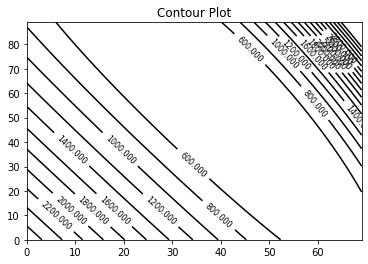

In [9]:
X, Y = np.meshgrid(x_grid, y_grid)

plt.figure()
level = np.arange(600, 4000, 200)
cp = plt.contour(z_contour, levels = level, colors = 'black')
plt.clabel(cp, inline=True,
          fontsize=8)
plt.title('Contour Plot')


For problems that demand more accuracy, other third-party standalone solvers can be
invoked via interfaces to `Python`.
For example, we can access [`NLopt`](http://ab-initio.mit.edu/wiki/index.php/NLopt_Installation)
through the packages [`nlopt`](https://nlopt.readthedocs.io/en/latest/NLopt_Python_Reference/).
However, standalone solvers usually have to be compiled and configured.
These steps are often not as straightforward as installing commercial Windows software.

`NLopt` offers an [extensive list of algorithms](http://ab-initio.mit.edu/wiki/index.php/NLopt_Algorithms#SLSQP).

**Example**

We first carry out the Nelder-Mead algorithm in NLOPT.

In [13]:
import nlopt

In [14]:
X = backup # as we used X in our contour-plot!

# Define PPML
# def poisson_loglik(b):
#     b = np.asarray(b).reshape(2,1)
#     Xb = np.exp(np.dot(X, b))
#     cols = -Xb + np.multiply(np.asarray(y), np.log(Xb))
#     ell = -cols.sum()
#     return(ell)

# Define gradient of PPML
def poisson_loglik_grad(b):
    b = np.asarray(b).reshape(2,1)
    Xb = np.exp(np.dot(X, b))
    cols = -(np.multiply(Xb, X)) + (np.multiply(X, y))
    ellg = -cols.sum()
    return(ellg)


In [17]:
# Implement function f for the nlopt algorithm
def f(x, grad):
    if grad.size > 0:
        grad[:] = poisson_loglik_grad(x)
    return poisson_loglik(x)

opt = nlopt.opt(nlopt.LN_NELDERMEAD, 2)
opt.set_min_objective(f)
opt.set_xtol_rel(1e-7)
opt.set_maxeval(500)

x = np.array(([0, -1]))
xopt = opt.optimize(x)
minf = opt.last_optimum_value()

print("optimum at ", xopt)
print("minimum value = ", minf)
print("result code = ", opt.last_optimize_result())
print("number of iterations = ", opt.get_maxeval())
print("successful = ", nlopt.SUCCESS)

optimum at  [ 1.17739745 -0.09993984]
minimum value =  261.1140782953288
result code =  4
number of iterations =  500
successful =  1


**Example II**

Now we implement the MLE in the conventional way via `statsmodels`

In [ ]:
from statsmodels.api import Poisson

# transform the data into arrays
y_array = np.asarray(y)
x_array = np.asarray(X)

# implementation
stats_poisson = Poisson(y_array, x_array).fit()
print(stats_poisson.summary())

As we can see from the summary table the constant and independent variable are equal to our result from the optimizations.

## Contrained Optimization

* `SciPy Optimize` is a very powerful tool for constraint linear and non linear optimization. For reference please visit the [Scipy webpage](https://docs.scipy.org/doc/scipy/reference/optimize.html).
* [`PuLP`](https://pythonhosted.org/PuLP/)can handle linear constrained problems. For a simple example please visit [Linear Programming in Python: A Straight Forward Tutorial](https://hackernoon.com/linear-programming-in-python-a-straight-forward-tutorial-a0d152618121). 
* Some algorithms in `nlopt`, for example, `NLOPT_LD_SLSQP`, can handle nonlinear constrained problems.
* `Gurobi`, and `CPLEX` are additional packages for constrained optimization.
 
## Convex Optimization

If a function is convex in its argument, then a local minimum is a global minimum.
Convex optimization is particularly important in high-dimensional problems. The readers are
referred to @boyd2004convex for an accessible comprehensive treatment. They claim that
"convex optimization is technology; all other optimizations are arts." This is true to some extent.


**Example**

* linear regression model MLE
* Lasso [@su2016identifying]
* Relaxed empirical likelihood [@shi2016econometric].

A class of common convex optimization can be reliably implemented in `R` or `Python`.
[`Rmosek`](http://rmosek.r-forge.r-project.org/) / [`Mosek for Python`](https://docs.mosek.com/9.0/pythonapi/index.html) is an interface in `R/Python` to access `Mosek`.
`Mosek` is a high-quality commercial solver dedicated to convex optimization.
It offers free academic licenses. (`Rtools` is a prerequisite to install `Rmosek` in R.)

An additional package for convex optimization in Python is [`CVXOPT`](https://cvxopt.org). It is fairly easy to implement and has a intuitive documentation.

In [ ]:
# example [modified] from https://docs.mosek.com/9.0/pythonfusion/_downloads/lo1.py
from mosek.fusion import *

# Create our matrices:
A = [[3.0, 1.0, 2.0, 0.0],
     [2.0, 1.0, 3.0, 1.0],
     [0.0, 2.0, 0.0, 3.0]]
c = [3.0, 1.0, 5.0, 1.0]

# Create a model with the name 'lo1'
with Model("lo1") as M:

    # Create variable 'x' of length 4
    x = M.variable("x", 4, Domain.greaterThan(0.0))

    # Create constraints
    M.constraint(x.index(1), Domain.lessThan(10.0))
    M.constraint("c1", Expr.dot(A[0], x), Domain.equalsTo(30.0))
    M.constraint("c2", Expr.dot(A[1], x), Domain.greaterThan(15.0))
    M.constraint("c3", Expr.dot(A[2], x), Domain.lessThan(25.0))

    # Set the objective function to (c^t * x)
    M.objective("obj", ObjectiveSense.Maximize, Expr.dot(c, x))

    # Solve the problem
    M.solve()

    # Get the solution values
    sol = x.level()
    print('\n'.join(["x[%d] = %f" % (i, sol[i]) for i in range(4)]))
    

A survey paper can be found here with [some recent development in convex optimization in econometrics](https://www.researchgate.net/publication/320805166_Convex_Programming_in_Econometrics). 